In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv file
portfolio = pd.read_csv('../../../Data/Portfolio.csv',parse_dates=True,index_col='T')


In [3]:
#tranform this into a matrix
X = portfolio.as_matrix()

#the last column is the target
Y = X[:,-1]

#create the design matrix2
X = X[:,0:-1]

index_name = portfolio.columns[:-1]

In [4]:
#setting up the model
lasso_model = linear_model.Lasso(fit_intercept=True, alpha=1e-6,copy_X=True,normalize=True)
lasso_model.fit(X,Y)

ols_model = linear_model.LinearRegression(fit_intercept=True)
ols_model.fit(X,Y)



/Users/jandespiegeleer/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
#using the function to estimate the portfolio return
X_test = np.array([0.01 , 0.01, 0.02 , -0.05 , 0.0, 0.01,0.07])
X_test = X_test.reshape((1,len(X_test)))
Y_test = ols_model.predict(X_test)
print(Y_test)

[0.04550743]


Gross Exposure Lasse : 168.33


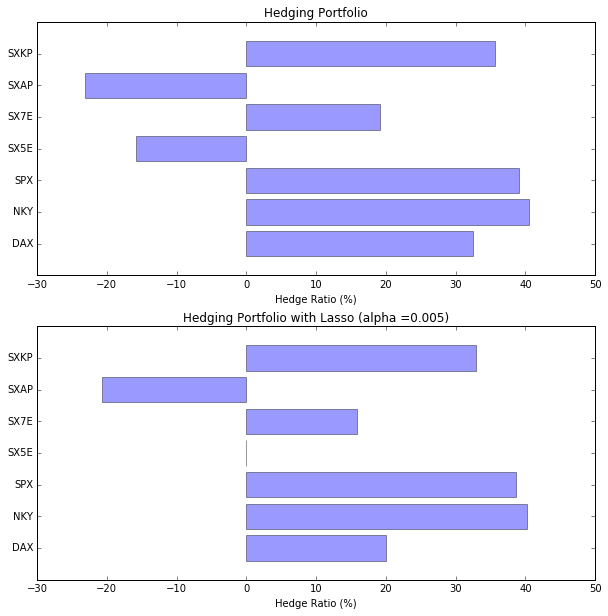

In [6]:
#OLS
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
y_pos = np.arange(len(index_name))
hedge_ols = ols_model.coef_
plt.barh(bottom=y_pos, width=hedge_ols*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio')
xmin, xmax = plt.xlim() 

#Ridge Regression
plt.subplot(2,1,2)
hedge_lasso = lasso_model.coef_
plt.barh(bottom=y_pos, width=hedge_lasso*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio with Lasso (alpha =0.005)')
plt.xlim([xmin,xmax])

print('Gross Exposure Lasse : {d:0.2f}'.format(d=100*np.sum(np.abs(hedge_lasso))))

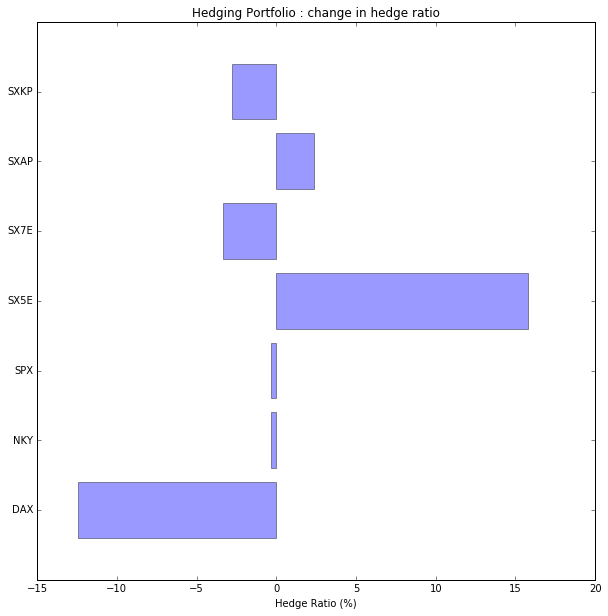

In [7]:
plt.figure(figsize=(10,10))
plt.barh(bottom=y_pos, width=(hedge_lasso-hedge_ols)*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio : change in hedge ratio')

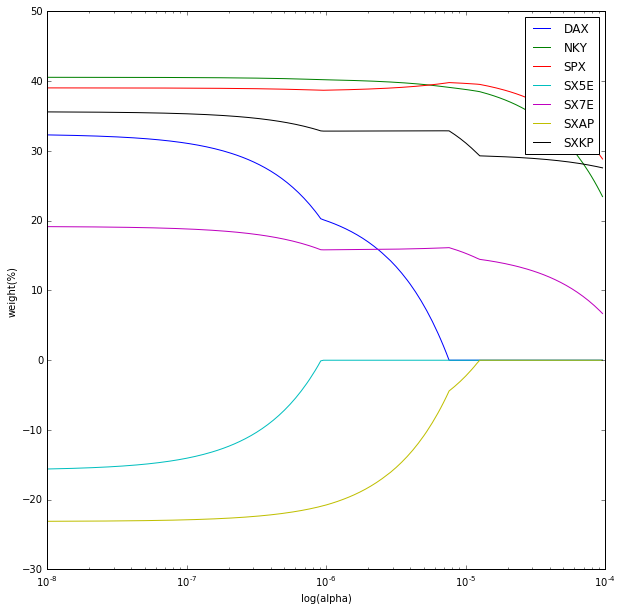

In [8]:
alpha = np.power(10,np.arange(-8,-4,0.02))
weights = np.zeros((len(alpha),len(index_name)),dtype=float)

for i in np.arange(0,len(alpha)):
    lasso_model = linear_model.Lasso(fit_intercept=True, alpha=alpha[i],copy_X=True,normalize=True)
    lasso_model.fit(X,Y)
    weights[i,:]= lasso_model.coef_

plt.figure(figsize=(10,10))    
for i in np.arange(0,len(index_name)):
    plt.semilogx(alpha[:],weights[:,i]*100,label=index_name[i])

plt.xlabel('log(alpha)')
plt.ylabel('weight(%)')
plt.legend(loc="upper right")
    

In [9]:
# use cross validation using 10 Fold cross validation
Lasso=linear_model.LassoCV(alphas=alpha,fit_intercept=True,normalize=True,cv=10)
Lasso.fit(X,Y)
print(Lasso.alpha_)
print(Lasso.coef_)

1.905460717963034e-06
[ 0.17231973  0.40049914  0.38863998  0.          0.1587209  -0.1849192
  0.32855846]


(-30.0, 50.0)

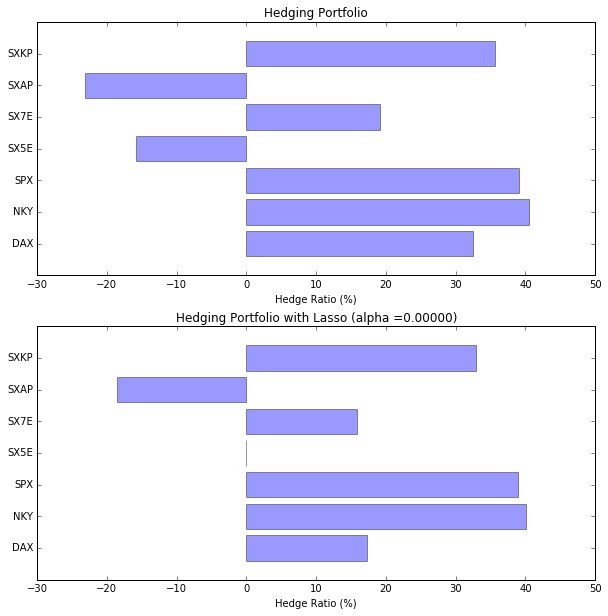

In [10]:
#OLS
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
y_pos = np.arange(len(index_name))
hedge_ols = ols_model.coef_
plt.barh(bottom=y_pos, width=hedge_ols*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio')
xmin, xmax = plt.xlim() 

#Optimal Ridge Regression
plt.subplot(2,1,2)
plt.barh(bottom=y_pos, width=Lasso.coef_*100, align='center', alpha=0.4)
plt.yticks(y_pos, index_name)
plt.xlabel('Hedge Ratio (%)')
plt.title('Hedging Portfolio with Lasso (alpha =%5.5f)' % Lasso.alpha_ )
plt.xlim([xmin,xmax])